# Analise sobre o custo médico para curar doenças causadas pelo tabagismo

## 1 - limpeza dos dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
db = pd.read_csv('dataset_.csv', index_col=None)


In [3]:
# Verificando informações

db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1338 non-null   int64  
 1   sex              1338 non-null   object 
 2   bmi              1338 non-null   float64
 3   children         1338 non-null   int64  
 4   smoker           1338 non-null   object 
 5   region           1338 non-null   object 
 6   medical charges  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
db.head(10)

,age,sex,bmi,children,smoker,region,medical charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
db.describe()

,age,bmi,children,medical charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# Verificando valores nulos.

db.isnull().sum().sort_values(ascending=False).head(20)

age                0
sex                0
bmi                0
children           0
smoker             0
region             0
medical charges    0
dtype: int64

In [7]:
# Número total de linhas duplicadas.

db.duplicated().sum()

np.int64(1)

In [8]:
db[db.duplicated()]

,age,sex,bmi,children,smoker,region,medical charges
581,19,male,30.59,0,no,northwest,1639.5631


In [9]:
db[db['medical charges']==1639.5631]

,age,sex,bmi,children,smoker,region,medical charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [10]:
index_to_remove = db[db['medical charges'] == 1639.5631].head(1).index
db.drop(index_to_remove, inplace=True)

In [11]:
# Verificando valores únicos em cada coluna.

db.nunique()

age                  47
sex                   2
bmi                 548
children              6
smoker                2
region                4
medical charges    1337
dtype: int64

## 2 - visualização dos dados

In [12]:
variaveis_numericas = []
for i in db.columns[0:11].tolist():
        if db.dtypes[i] == 'int64' or db.dtypes[i] == 'float64':                        
            variaveis_numericas.append(i)  

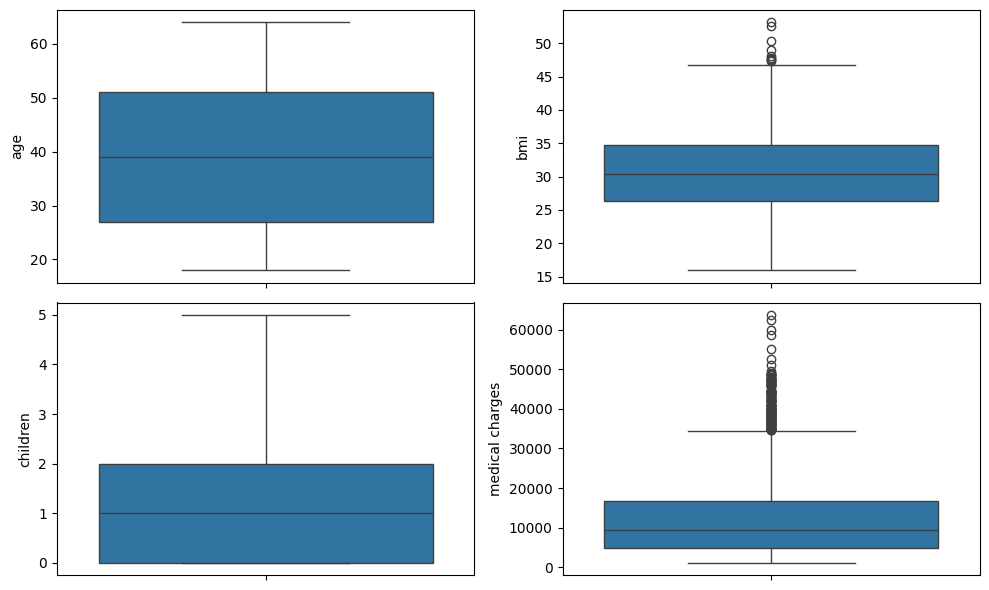

In [13]:
# Possíveis outliers.

plt.rcParams["figure.figsize"] = [10,6]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = db, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.show()

### 2.1 - Matriz de correlação

In [14]:
# Transformando os valores de tipo object em inteiros de forma temporária para facilitar a criação da matriz de confusão.

db_temp = db.copy()

db_temp['smoker'] = db_temp['smoker'].map({'yes': 1, 'no': 0})
db_temp['region'] = db_temp['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})
db_temp['sex'] = db_temp['sex'].map({'male': 0, 'female': 1})

correlation_matrix = db_temp.corr()

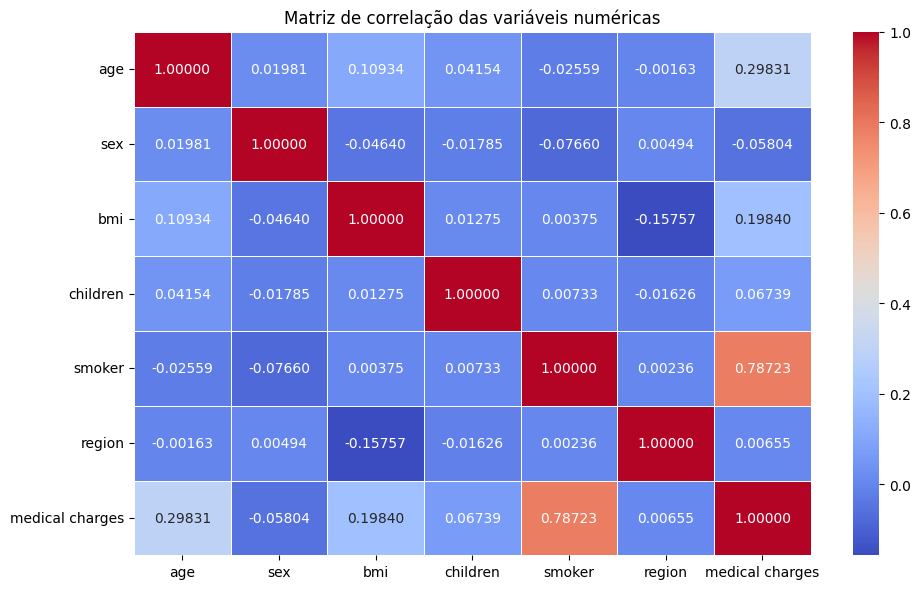

In [15]:
# Abaixo a matriz de correlação entre as variáveis.

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.5f', linewidths=0.5)
plt.title('Matriz de correlação das variáveis numéricas')
plt.show()

### Correlação entre Variáveis
- **Idade e Gastos Médicos**: Existe uma correlação positiva moderada, indicando que, em geral, à medida que a idade aumenta, os custos médicos também tendem a aumentar.

- **Sexo e Gastos Médicos**: Correlação muito fraca negativa, indicando pouca ou nenhuma relação direta entre os dois.

- **IMC (BMI) e Gastos Médicos**: A correlação positiva fraca sugere que o índice de massa corporal tem um impacto leve nos custos médicos.

- **Número de Filhos e Gastos Médicos**: A correlação entre o número de filhos e os gastos médicos é muito fraca, indicando que o número de dependentes tem pouco impacto nos custos médicos.

- **Fumante e Gastos Médicos**: A correlação mais forte e positiva, sugere que o status de fumante está fortemente associado a maiores despesas médicas, refletindo a influência significativa do tabagismo nos custos com saúde.

- **Região e Gastos Médicos**: Uma correlação muito fraca com os custos médicos, indicando que não é um fator significativo para explicar variações nos custos.

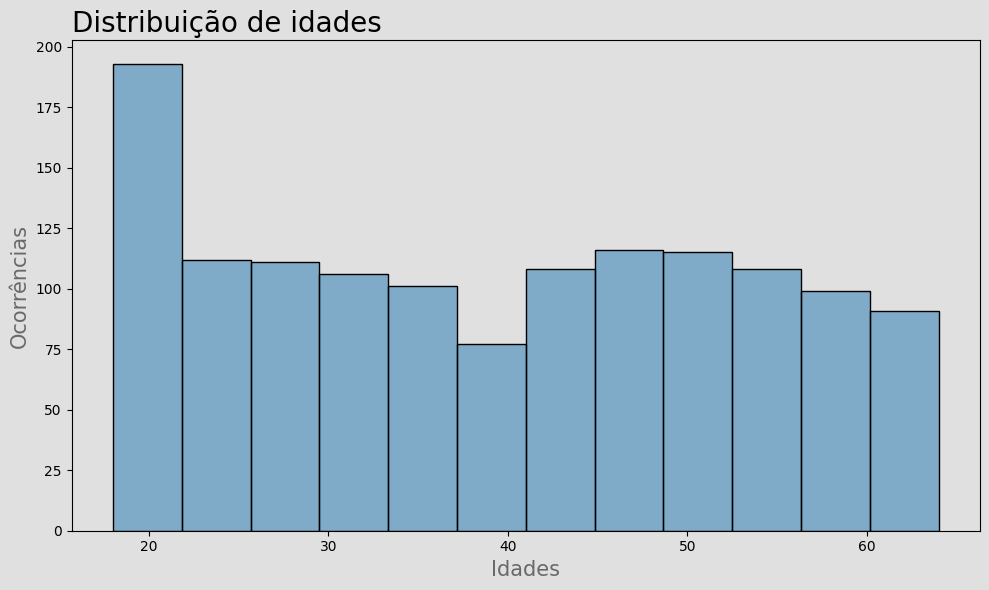

In [16]:
plt.figure(figsize=(10, 6))

sns.histplot(
    data=db,
    x='age',
    multiple='stack',
    alpha=0.5,  
    kde=False
)

plt.title('Distribuição de idades', fontsize=20, loc='left')
plt.xlabel('Idades', fontsize=15, color='#696969')
plt.ylabel('Ocorrências', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.show()

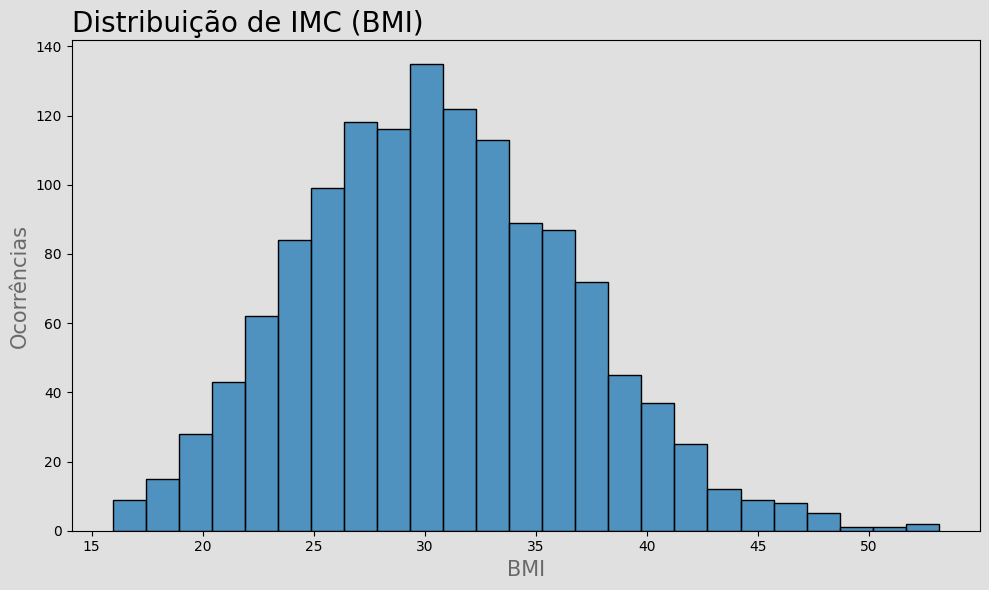

In [17]:
plt.figure(figsize=(10, 6))

sns.histplot(data=db, x="bmi")

plt.title('Distribuição de IMC (BMI)', fontsize=20, loc='left')
plt.xlabel('BMI', fontsize=15, color='#696969')
plt.ylabel('Ocorrências', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.show()

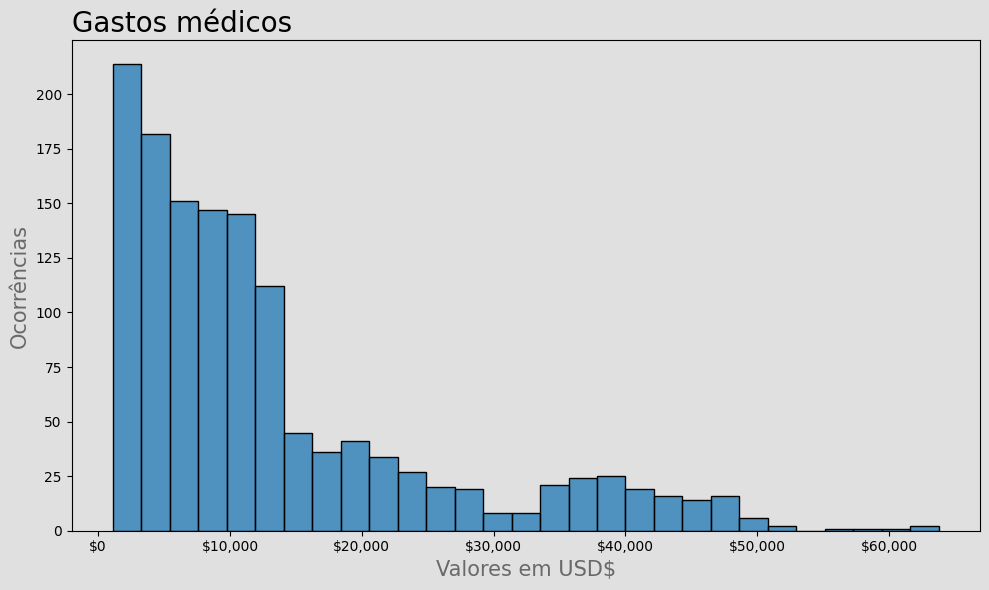

In [18]:
plt.figure(figsize=(10, 6))

sns.histplot(data=db, x="medical charges")

plt.title('Gastos médicos', fontsize=20, loc='left')
plt.xlabel('Valores em USD$', fontsize=15, color='#696969')
plt.ylabel('Ocorrências', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.show()

In [19]:
db.groupby(['sex']).size()

sex
female    662
male      675
dtype: int64

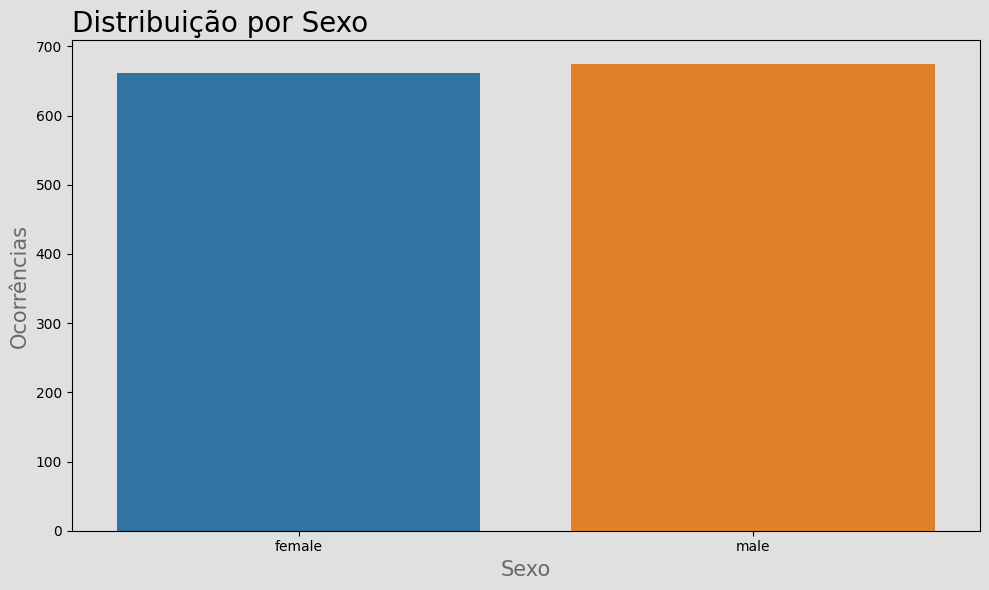

In [20]:
plt.figure(figsize=(10, 6))

sns.countplot(data=db, x="sex", hue="sex")

plt.title('Distribuição por Sexo', fontsize=20, loc='left')
plt.xlabel('Sexo', fontsize=15, color='#696969')
plt.ylabel('Ocorrências', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.show()

In [21]:
db.groupby(['children']).size()

children
0    573
1    324
2    240
3    157
4     25
5     18
dtype: int64

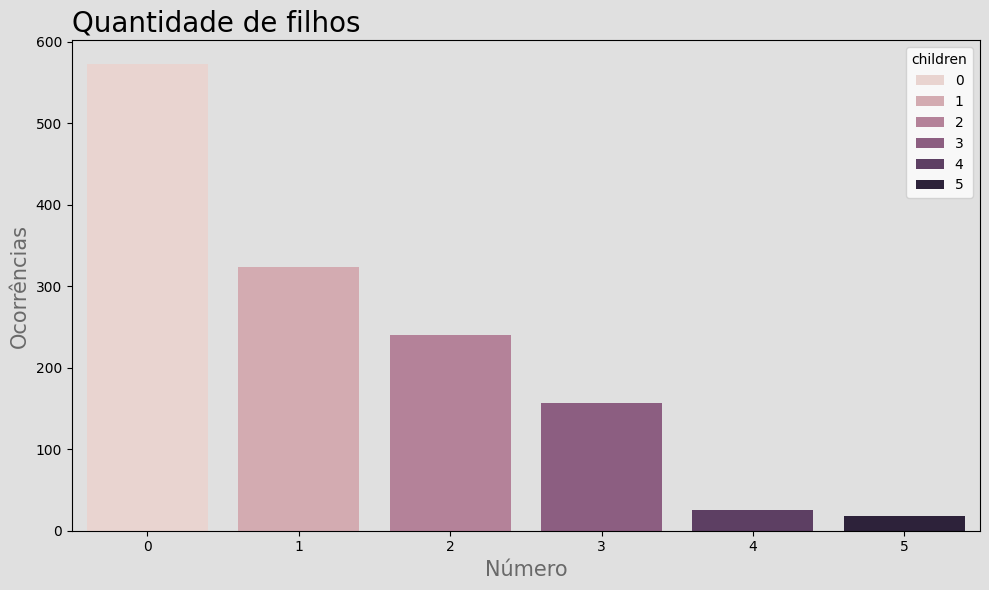

In [22]:
plt.figure(figsize=(10, 6))

sns.countplot(data=db, x="children", hue="children")

plt.title('Quantidade de filhos', fontsize=20, loc='left')
plt.xlabel('Número', fontsize=15, color='#696969')
plt.ylabel('Ocorrências', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.show()

In [23]:
db.groupby(['smoker']).size()

smoker
no     1063
yes     274
dtype: int64

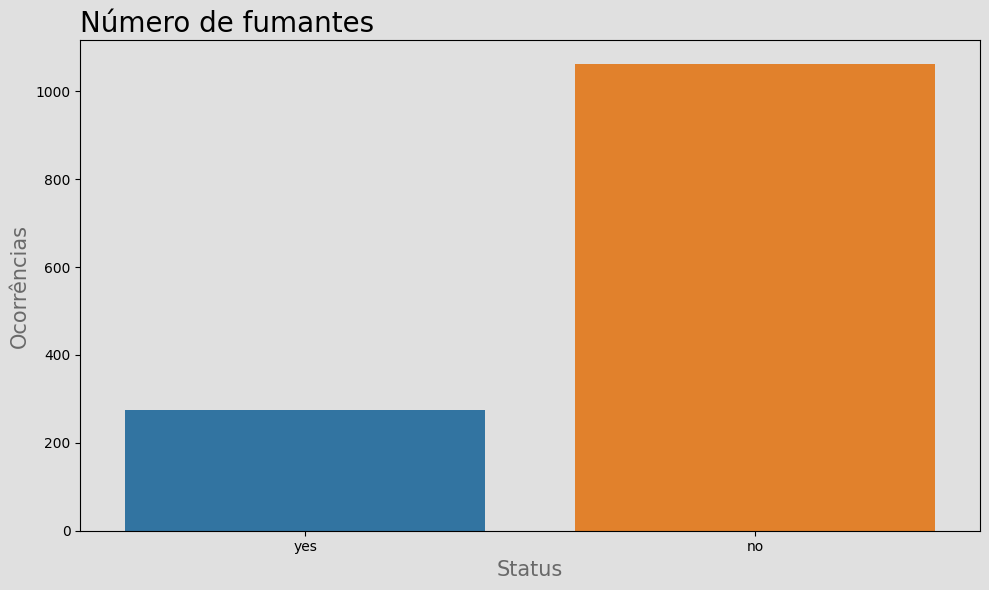

In [24]:
plt.figure(figsize=(10, 6))

sns.countplot(data=db, x="smoker", hue="smoker")

plt.title('Número de fumantes', fontsize=20, loc='left')
plt.xlabel('Status', fontsize=15, color='#696969')
plt.ylabel('Ocorrências', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.show()

In [25]:
db.groupby(['region']).size()

region
northeast    324
northwest    324
southeast    364
southwest    325
dtype: int64

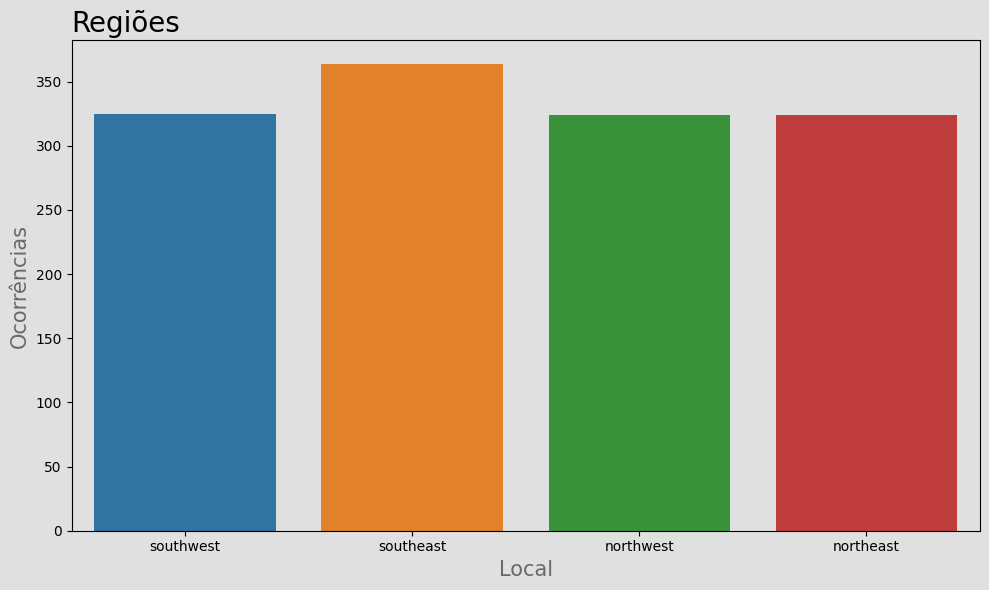

In [26]:
plt.figure(figsize=(10, 6))

sns.countplot(data=db, x="region", hue="region")

plt.title('Regiões', fontsize=20, loc='left')
plt.xlabel('Local', fontsize=15, color='#696969')
plt.ylabel('Ocorrências', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.show()

## 3 - Comparações entre as colunas

### 3.1 - Gastos médicos X Fumantes

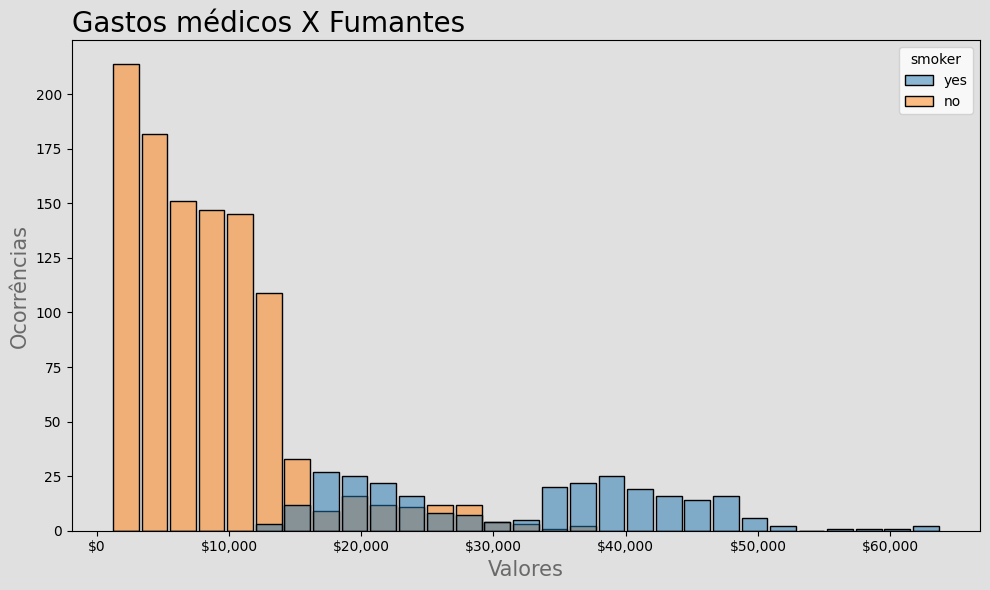

In [27]:
plt.figure(figsize=(10, 6))

sns.histplot(data=db, x="medical charges", shrink=.9, hue="smoker")

plt.title('Gastos médicos X Fumantes', fontsize=20, loc='left')
plt.xlabel('Valores', fontsize=15, color='#696969')
plt.ylabel('Ocorrências', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.show()

### 3.2 - Gastos médicos X Idade

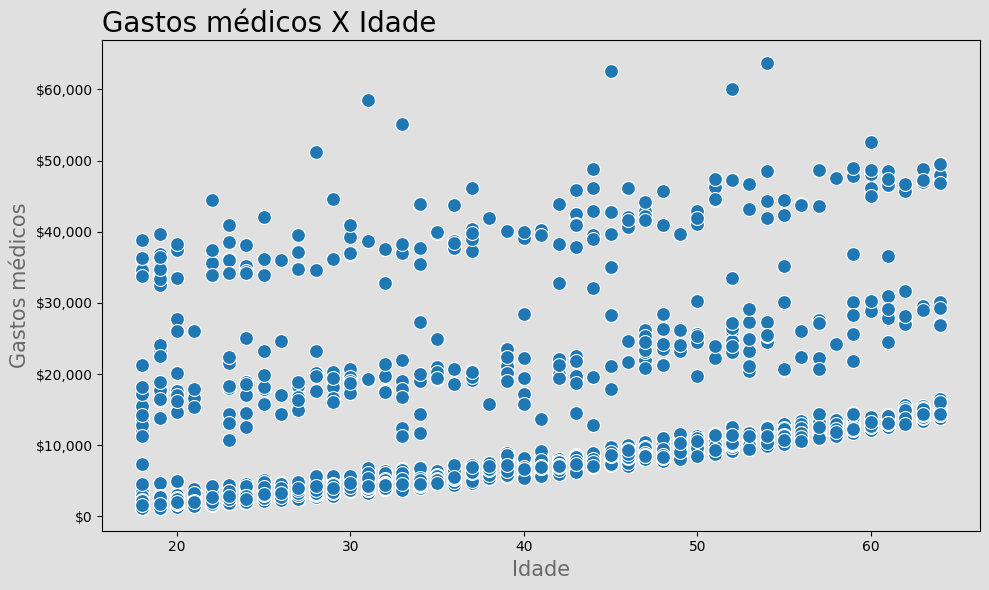

In [28]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=db, 
    x='age', 
    y='medical charges',
    s=100
)

plt.title('Gastos médicos X Idade', fontsize=20, loc='left')
plt.xlabel('Idade', fontsize=15, color='#696969')
plt.ylabel('Gastos médicos', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.show()

### 3.3 - Gastos médicos X Idade X Fumantes

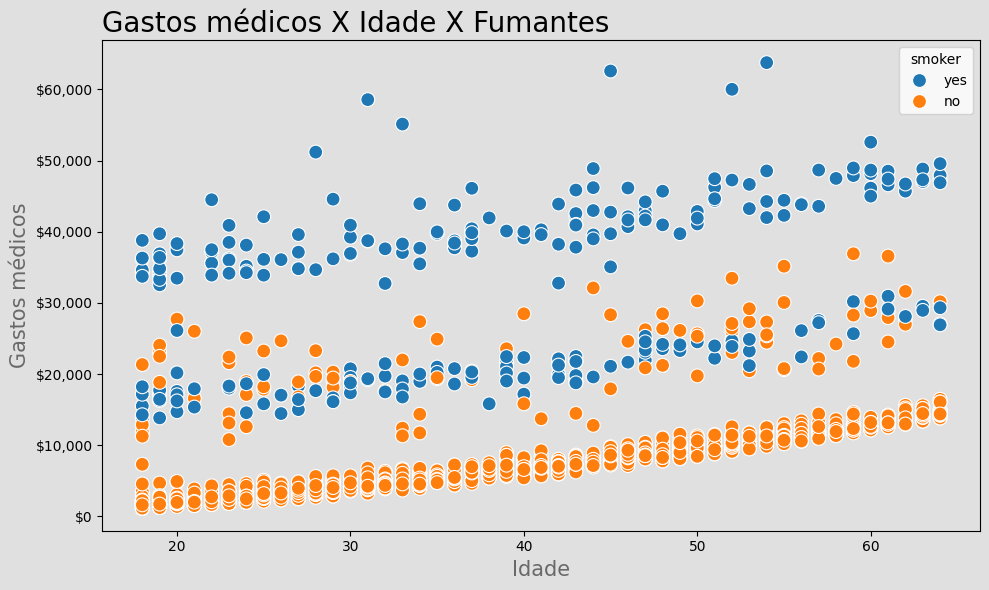

In [29]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=db, 
    x='age', 
    y='medical charges',
    hue='smoker',
    s=100
)

plt.title('Gastos médicos X Idade X Fumantes', fontsize=20, loc='left')
plt.xlabel('Idade', fontsize=15, color='#696969')
plt.ylabel('Gastos médicos', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.show()

### 3.4 - Gastos médicos X BMI X Fumantes

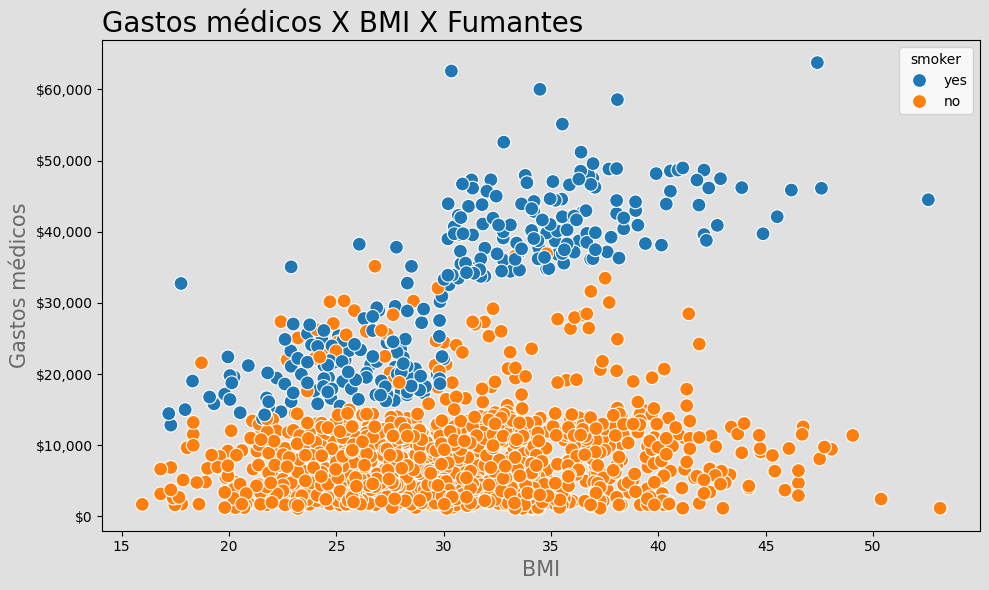

In [30]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=db, 
    y='medical charges', 
    x='bmi', 
    hue='smoker',
    s=100
)

plt.title('Gastos médicos X BMI X Fumantes', fontsize=20, loc='left')
plt.xlabel('BMI', fontsize=15, color='#696969')
plt.ylabel('Gastos médicos', fontsize=15, color='#696969')

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0')

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.show()

## 4 - Conclusão

No geral, os dados indicam que o tabagismo é um fator crítico associado a altos gastos médicos, junto com a idade que também tem certa notoriedade, embora menos siginificativa. A variação no IMC (BMI), o número de filhos, sexo e região têm impactos menores nos custos médicos com os dados apresentados.
